In [1]:
#Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. 
#Perform following tasks: 
#1.  Pre-process the dataset. 
#2.  Identify outliers. 
#3.  Check the correlation. 
#4.  Implement linear regression and random forest regression models. 
#5.  Evaluate the models and compare their respective scores like R2, RMSE, etc. 

In [21]:
import pandas as pd

In [22]:
import numpy as np
import seaborn as sns

In [23]:
dataframe=pd.read_csv("uber.csv")

In [24]:
df=dataframe

In [25]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [27]:
df=df.dropna()

In [28]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [29]:
df=df.drop(['Unnamed: 0','key'],axis=1)

In [30]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [31]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [32]:
df['pickup_datetime'].dtypes

datetime64[ns, UTC]

In [33]:
df['hour']=df['pickup_datetime'].dt.hour
df['day']=df['pickup_datetime'].dt.day
df['month']=df['pickup_datetime'].dt.month

In [34]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month'],
      dtype='object')

In [35]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8


In [36]:
df.drop('pickup_datetime',axis=1,inplace=True)

In [37]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8


## Outliers

<Axes: >

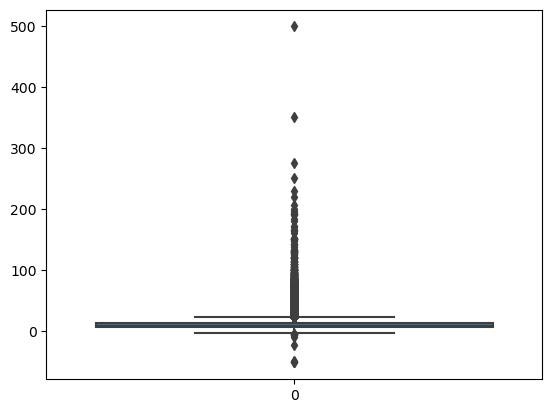

In [38]:
sns.boxplot(df['fare_amount'])

In [39]:
#calculate IQR 
Q1=df['fare_amount'].quantile(0.25)
Q3=df['fare_amount'].quantile(0.75)

IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers=df[(df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)]

print('The outliers detected: ')
print(outliers)

The outliers detected: 
        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
6             24.50        -73.961447        40.693965         -73.871195   
30            25.70        -73.944815        40.834367         -73.989332   
34            39.50        -73.788080        40.642187         -73.865042   
39            29.00        -73.992600        40.753172         -73.908508   
48            56.80        -73.993498        40.764686         -73.993498   
...             ...               ...              ...                ...   
199976        49.70        -73.978225        40.783318         -73.700963   
199977        43.50        -73.996671        40.737483         -73.867758   
199982        57.33        -73.969204        40.754771         -73.790351   
199985        24.00        -74.005089        40.737301         -73.945290   
199997        30.90        -73.986017        40.756487         -73.858957   

        dropoff_latitude  passenger_count  hour  da

In [40]:
print('Maximum value in the outlier is: '+ str(outliers.max()))

Maximum value in the outlier is: fare_amount          499.000000
pickup_longitude      40.775330
pickup_latitude       42.478467
dropoff_longitude     40.828672
dropoff_latitude      42.464187
passenger_count        6.000000
hour                  23.000000
day                   31.000000
month                 12.000000
dtype: float64


In [41]:
df=df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]    #Removed outliers

## Checking Correlation

In [42]:
correlation_matrix=df.corr()
print(correlation_matrix)

                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.000367         0.002618   
pickup_longitude      0.000367          1.000000        -0.812047   
pickup_latitude       0.002618         -0.812047         1.000000   
dropoff_longitude    -0.002413          0.835950        -0.767103   
dropoff_latitude      0.000589         -0.850574         0.684558   
passenger_count       0.012618         -0.000751        -0.001604   
hour                 -0.013219          0.003544        -0.004675   
day                   0.006860          0.003144        -0.006687   
month                 0.026338         -0.003949         0.004153   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
fare_amount                -0.002413          0.000589         0.012618   
pickup_longitude            0.835950         -0.850574        -0.000751   
pickup_latitude            -0.767103          0.684558        -0.001604   
dropoff_l

<Axes: >

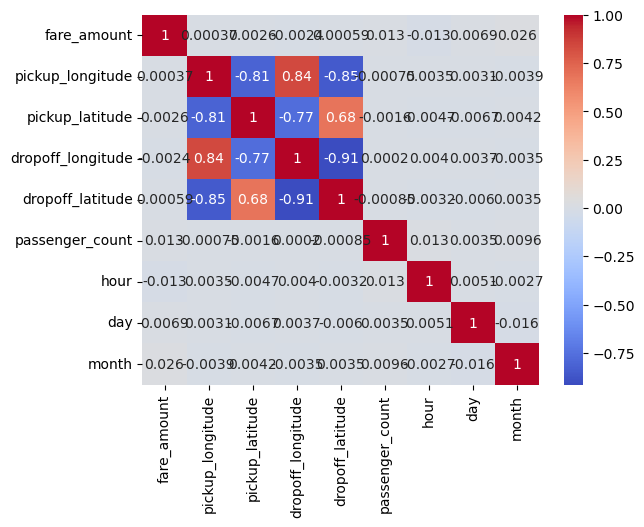

In [75]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

## Linear Regression and random Forest

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
x=df.drop('fare_amount',axis=1)     #Features
y=df['fare_amount']                 #target Variable

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month
146349,-73.994882,40.745052,-73.984818,40.755027,1,11,29,3
175408,-73.981169,40.761171,-73.988466,40.776507,1,2,19,9
140313,-73.972489,40.752524,-74.008745,40.747413,3,19,7,11
151905,-73.981670,40.728602,-73.963430,40.774333,1,18,28,1
145703,-73.949208,40.771922,-73.975422,40.759688,1,22,1,12


In [49]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [50]:
lr_yPred=lr_model.predict(x_test)

In [51]:
lr_yPred

array([8.8274682 , 8.75821299, 8.83782089, ..., 8.95963745, 8.87791315,
       8.88386746])

In [56]:
rf_model=RandomForestRegressor(n_estimators=5, random_state=42)
rf_model.fit(x_train,y_train)
rf_yPred=rf_model.predict(x_test)

In [57]:
#R2 Score for Linear Regression
r2_lr=r2_score(y_test, lr_yPred)
print('R2 Score for Linear Regression is : ',r2_lr)

R2 Score for Linear Regression is :  0.0008522538818107606


In [59]:
#R2 Score for Random Forest 
r2_rf=r2_score(y_test, rf_yPred)
print('R2 Score for Random Forest is : ',r2_rf)

R2 Score for Random Forest is :  0.6565213453773625


In [60]:
#Mean Squared Error for Linear regression
mse_lr=np.sqrt(mean_squared_error(y_test, lr_yPred))

In [61]:
print('MSE for Linear Regression is : ',mse_lr)

MSE for Linear Regression is :  4.135032732857286


In [62]:
# use same for random forest

In [72]:
# Prediction on New Data

import pandas as pd

# Create a new DataFrame with hour, day, and month features
new_data = pd.DataFrame({
    'pickup_longitude': [-73.986428],  # Example longitude for pickup
    'pickup_latitude': [40.748917],    # Example latitude for pickup
    'dropoff_longitude': [-73.985428], # Example longitude for drop-off
    'dropoff_latitude': [40.748817],   # Example latitude for drop-off
    'passenger_count': [1],            # Example number of passengers
    'hour': [14],                      # Extracted hour from pickup_datetime
    'day': [8],                        # Extracted day from pickup_datetime
    'month': [10]                      # Extracted month from pickup_datetime
})

# Now you can use this new_data for predictions


In [71]:
# Use the trained Linear Regression model to predict the price
predicted_price_lr = lr_model.predict(new_data)
print("Predicted Price (Linear Regression):", predicted_price_lr[0])

# Use the trained Random Forest Regression model to predict the price
predicted_price_rf = rf_model.predict(new_data)
print("Predicted Price (Random Forest):", predicted_price_rf[0])


Predicted Price (Linear Regression): 9.005636782999247
Predicted Price (Random Forest): 5.26
